In [31]:
import pandas as pd
import stan
import arviz as az
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [32]:
# Read in the csv as a pandas dataframe
df = pd.read_csv('sample_response_times.csv', delimiter=';')
df

,rt,choice,condition
0,0.477,1.0,1.0
1,0.600,1.0,1.0
2,0.500,0.0,1.0
3,0.416,1.0,1.0
4,0.435,1.0,1.0
...,...,...,...
295,0.528,0.0,2.0
296,0.621,0.0,2.0
297,0.480,1.0,2.0
298,0.693,1.0,2.0


In [33]:
# Building the stan model
data = {
    'N': 300,
    'y': df.rt.values,
    'condition': df.condition.values.astype(int),
    'choice' : df.choice.values.astype(int)
}
with open("diffusion_model.stan") as stanFile:
    stanCode = stanFile.read()

stanModel = stan.build(stanCode, data = data)
fitData = stanModel.sample(num_chains = 4, num_samples = 2500, num_warmup = 1000)

Building...



Building: found in cache, done.Sampling:   0%
Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  12% (1700/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2700/14000)
Sampling:  21% (2900/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24% (3300/14000)
Sampling:  43% (6000/14000)
Sampling:  62% (8700/14000)
Sampling:  81% (11300/14000)
Sampling: 100% (14000/14000)
Sampling: 100% (1400

Future exception was never retrieved
future: <Future finished exception=RuntimeError('write: Connection reset by peer [system:104]')>
concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.8/concurrent/futures/process.py", line 239, in _process_worker
    r = call_item.fn(*call_item.args, **call_item.kwargs)
  File "/home/kyogrekube/.local/lib/python3.8/site-packages/httpstan/services_stub.py", line 47, in _make_lazy_function_wrapper_helper
    return function(*args, **kwargs)  # type: ignore
RuntimeError: write: Connection reset by peer [system:104]
"""

The above exception was the direct cause of the following exception:

RuntimeError: write: Connection reset by peer [system:104]


In [48]:
# Show data numerically
az.summary(fitData)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v[0],2.652,0.259,2.142,3.112,0.003,0.002,7495.0,6993.0,1.0
v[1],0.516,0.180,0.189,0.858,0.002,0.002,5870.0,3955.0,1.0
a,0.851,0.026,0.800,0.898,0.000,0.000,7100.0,6715.0,1.0
b,0.511,0.021,0.471,0.549,0.000,0.000,6407.0,6629.0,1.0
t,0.397,0.003,0.391,0.402,0.000,0.000,6593.0,6255.0,1.0


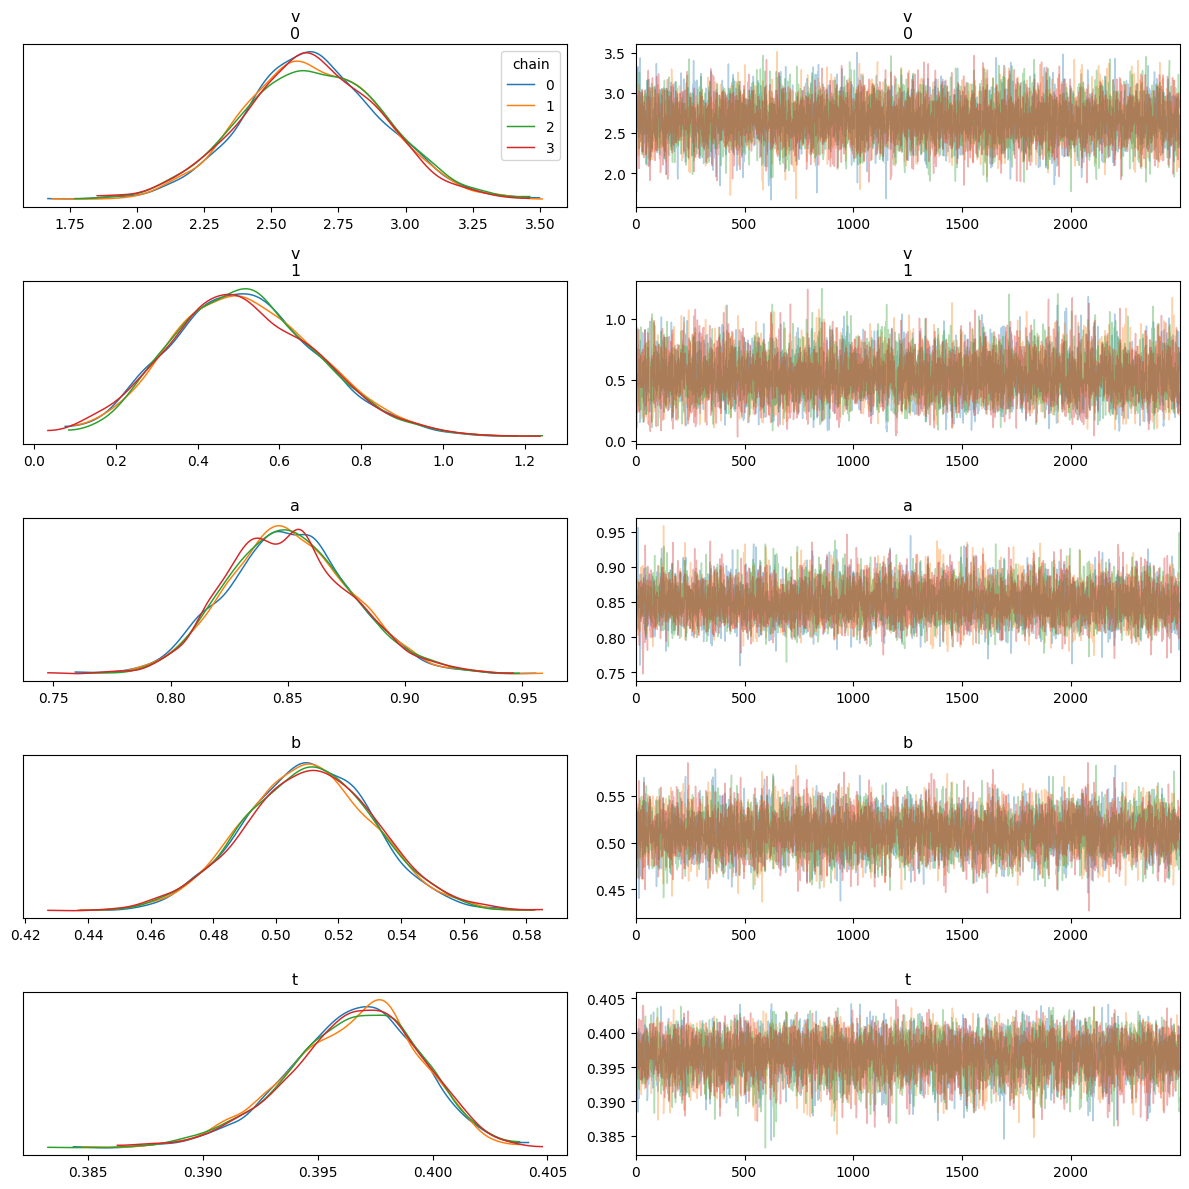

In [47]:
# Show data graphically
f = az.plot_trace(fitData, figsize = (12, 12), compact = False, legend = True)
plt.tight_layout()

The parameter that shows the difficulty of the task is v, also known as the drift rate. When this is higher, the task is easier as decisions can be made faster. We can see that v[0] (condition 0) has a drift rate of 2.652 and v[1] (condition 1) has a drift rate of 0.516. Thus, we know that the decision time for condition 0 is faster than condition 1, which makes condition 0 the easier task and condition 1 the harder task.